# SALES PREDICTION USING PYTHON

Vishant

In [1]:
#Load neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.shape


(200, 5)

In [5]:
df.size

1000

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df=df.drop(columns=["Unnamed: 0"])

In [8]:
df. head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


Dataset Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


PREPROCESSING THE DATA

Check for Null Values

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


DATA VISUALIZATION

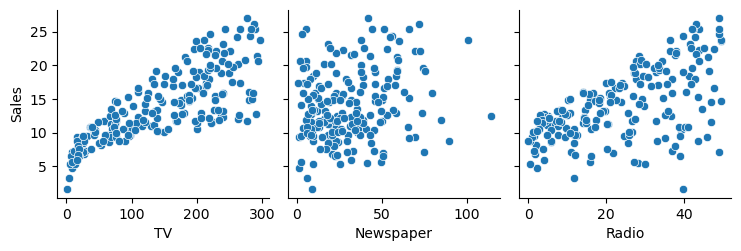

In [15]:
#ScatterPlot Sales vs TV,Newspaper,Radio
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

In [16]:
#check for outliers
fig, axs  = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt1 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

Prediction of Sales using LinearRegression

Splitting the datset into X,the attributes and y,the target variable i;e sales

In [17]:
x=df.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)


In [20]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#fitting the model to the dataset
model.fit(X_train,y_train)

LinearRegression()

In [22]:
#Prediction
y_predictions=model.predict(X_test)

In [23]:
y_predictions

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [24]:
print(model.intercept_)
print(model.coef_)

2.937215734690609
[0.04695205 0.17658644 0.00185115]


In [25]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predictions.flatten()})
act_predict.head(10)

,Actual,Predict
0,23.8,21.663183
1,16.6,16.441379
2,9.5,7.691446
3,14.8,17.916317
4,17.6,18.670471
5,25.5,23.791993
6,16.9,16.282543
7,12.9,13.441387
8,10.5,9.152940
9,17.1,17.324753


Now evaluate the model

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predictions))
print("Mean_squared_error:",mean_squared_error(y_test,y_predictions))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predictions)))
print("r2_score:",r2_score(y_test,y_predictions))

Mean_absolute_error: 1.0548328405073317
Mean_squared_error: 1.928924907466572
Squre_Mean_absolute_error: 1.0270505540173434
r2_score: 0.9224605706201435
